<a href="https://colab.research.google.com/github/dhanavel2021/SVM/blob/main/Support_Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

In [6]:
data=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv')

In [7]:
data1=pd.get_dummies(data)
data1
data1.drop(['User ID'],axis=1)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [8]:
x=data1.drop(['Purchased'],axis=1).values
y=data1['Purchased'].values

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
c=SVC(probability=True)
c.fit(x_train,y_train)

SVC(probability=True)

In [27]:
p=c.predict(x_test)


In [28]:
accuracy_score(y_test,p)

0.725

In [29]:
z=classification_report(y_test,p)
print(z)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_proba=c.predict_proba(x_test)
y_predicted=y_proba[:,1]

In [31]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [32]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7010188087774295


Text(0, 0.5, 'True Positive Rate(sensitivity')

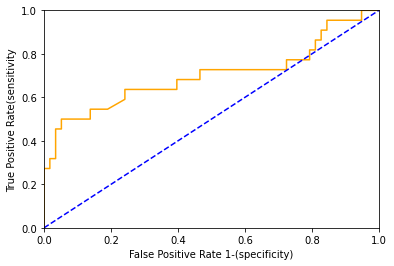

In [33]:
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')